In [4]:
# comparisons
# https://docs.google.com/spreadsheets/u/1/d/e/2PACX-1vTX5x2nxCde90Zwo83cdixZsyd_hU1orGsGYKpDe344wHeFi9MqI71aZYC6GLjOV_P2lp6_lUoacPNa/pubhtml?gid=1467787327&single=true
# https://twitter.com/jkwan_md/status/1312035412274221058?s=21
# https://russell-pollari.github.io/ontario-covid19/

import pandas as pd
import numpy as np
import urllib, json
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import datetime as dt
import data_describe as dd

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# set the standard plot size
plt.rcParams['figure.figsize']=(30,15)

In [9]:
# %%time
# get the "Confirmed positive cases of COVID19 in Ontario" data
# https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario/resource/455fd63b-603d-4608-8216-7d8647f43350
# import data using the ontario open data API
# make sure to check the limit against current cases
url = "https://data.ontario.ca/en/api/3/action/datastore_search?resource_id=455fd63b-603d-4608-8216-7d8647f43350&limit=600000"
response = urllib.request.urlopen(url)

In [10]:
data = json.loads(response.read().decode('utf-8'))

# use this if you want to see the json
# print (data['result']['records'])

# use this if you want to write it to a pandas dataframe

In [11]:
df = pd.DataFrame(data['result']['records'])

In [12]:
%%time
# get the "Status of COVID-19 Cases in Ontario" data
# https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario
# make sure to check the limit against current cases
url = "https://data.ontario.ca/en/api/3/action/datastore_search?resource_id=ed270bb8-340b-41f9-a7c6-e8ef587e6d11&limit=600000"
response = urllib.request.urlopen(url)
data = json.loads(response.read().decode('utf-8'))

# use this if you want to see the json
# print (data['result']['records'])

status_df = pd.DataFrame(data['result']['records'])

CPU times: user 240 ms, sys: 6.1 ms, total: 247 ms
Wall time: 1.07 s


In [13]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543315 entries, 0 to 543314
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   _id                        543315 non-null  int64  
 1   Row_ID                     543315 non-null  int64  
 2   Accurate_Episode_Date      543315 non-null  object 
 3   Case_Reported_Date         543315 non-null  object 
 4   Test_Reported_Date         530879 non-null  object 
 5   Specimen_Date              541068 non-null  object 
 6   Age_Group                  543315 non-null  object 
 7   Client_Gender              543315 non-null  object 
 8   Case_AcquisitionInfo       543315 non-null  object 
 9   Outcome1                   543315 non-null  object 
 10  Outbreak_Related           92374 non-null   object 
 11  Reporting_PHU_ID           543315 non-null  int64  
 12  Reporting_PHU              543315 non-null  object 
 13  Reporting_PHU_Address      54

_id  Row_ID Accurate_Episode_Date   Case_Reported_Date  \
0    1       1   2020-03-15T00:00:00  2020-03-25T00:00:00   
1    2       2   2020-03-22T00:00:00  2020-04-03T00:00:00   
2    3       3   2020-03-20T00:00:00  2020-04-02T00:00:00   
3    4       4   2020-03-20T00:00:00  2020-04-05T00:00:00   
4    5       5   2020-03-24T00:00:00  2020-03-30T00:00:00   

    Test_Reported_Date        Specimen_Date Age_Group Client_Gender  \
0  2020-03-31T00:00:00  2020-03-22T00:00:00       40s        FEMALE   
1  2020-04-03T00:00:00  2020-03-30T00:00:00       60s          MALE   
2  2020-04-02T00:00:00  2020-03-28T00:00:00       40s          MALE   
3  2020-04-05T00:00:00  2020-03-28T00:00:00       <20        FEMALE   
4  2020-03-30T00:00:00  2020-03-28T00:00:00       40s        FEMALE   

  Case_AcquisitionInfo  Outcome1 Outbreak_Related  Reporting_PHU_ID  \
0               TRAVEL  Resolved             None              2253   
1               TRAVEL  Resolved             None              2236   
2                   CC  Resolved             None              2253   
3                   CC  Resolved             None              2253   
4                   CC  Resolved             None              2253   

                     Reporting_PHU   Reporting_PHU_Address Reporting_PHU_City  \
0               Peel Public Health  7120 Hurontario Street        Mississauga   
1  Halton Region Health Department        1151 Bronte Road           Oakville   
2               Peel Public Health  7120 Hurontario Street        Mississauga   
3               Peel Public Health  7120 Hurontario Street        Mississauga   
4               Peel Public Health  7120 Hurontario Street        Mississauga   

  Reporting_PHU_Postal_Code                        Reporting_PHU_Website  \
0                   L5W 1N4                    www.peelregion.ca/health/   
1                   L6M 3Ll  www.halton.ca/For-Residents/Public-Health/    
2                   L5W 1N4                    www.peelregion.ca/health/   
3                   L5W 1N4                    www.peelregion.ca/health/   
4                   L5W 1N4                    www.peelregion.ca/health/   

   Reporting_PHU_Latitude  Reporting_PHU_Longitude  
0               43.647471               -79.708893  
1               43.413997               -79.744796  
2               43.647471               -79.708893  
3               43.647471               -79.708893  
4               43.647471               -79.708893

In [14]:
status_df.info()
status_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 28 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   _id                                                        505 non-null    int64  
 1   Reported Date                                              505 non-null    object 
 2   Confirmed Negative                                         47 non-null     float64
 3   Presumptive Negative                                       12 non-null     float64
 4   Presumptive Positive                                       25 non-null     float64
 5   Confirmed Positive                                         503 non-null    float64
 6   Resolved                                                   493 non-null    float64
 7   Deaths                                                     465 non-null    float64
 8   Total Case

_id        Reported Date  Confirmed Negative  Presumptive Negative  \
0    1  2020-01-26T00:00:00                 NaN                   NaN   
1    2  2020-01-27T00:00:00                 NaN                   NaN   
2    3  2020-01-28T00:00:00                 NaN                   NaN   
3    4  2020-01-30T00:00:00                 NaN                   NaN   
4    5  2020-01-31T00:00:00                 NaN                   NaN   

   Presumptive Positive  Confirmed Positive  Resolved  Deaths  Total Cases  \
0                   1.0                 NaN       NaN     NaN          NaN   
1                   2.0                 NaN       NaN     NaN          NaN   
2                   1.0                 1.0       NaN     NaN          1.0   
3                   0.0                 2.0       NaN     NaN          2.0   
4                   0.0                 2.0       NaN     NaN          2.0   

   Total patients approved for testing as of Reporting Date  ...  \
0                                                NaN         ...   
1                                                NaN         ...   
2                                                NaN         ...   
3                                                NaN         ...   
4                                                NaN         ...   

   Num. of patients in ICU on a ventilator testing positive  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   Num. of patients in ICU on a ventilator testing negative  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   Total Positive LTC Resident Cases  Total Positive LTC HCW Cases  \
0                                NaN                           NaN   
1                                NaN                           NaN   
2                                NaN                           NaN   
3                                NaN                           NaN   
4                                NaN                           NaN   

   Total LTC Resident Deaths  Total LTC HCW Deaths  \
0                        NaN                   NaN   
1                        NaN                   NaN   
2                        NaN                   NaN   
3                        NaN                   NaN   
4                        NaN                   NaN   

   Total_Lineage_B.1.1.7_Alpha  Total_Lineage_B.1.351_Beta  \
0                          NaN                         NaN   
1                          NaN                         NaN   
2                          NaN                         NaN   
3                          NaN                         NaN   
4                          NaN                         NaN   

   Total_Lineage_P.1_Gamma  Total_Lineage_B.1.617.2_Delta  
0                      NaN                            NaN  
1                      NaN                            NaN  
2                      NaN                            NaN  
3                      NaN                            NaN  
4                      NaN                            NaN  

[5 rows x 28 columns]

In [15]:
# share this tool - https://github.com/data-describe/data-describe
dd.data_summary(status_df)

/home/gbby/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning:

invalid value encountered in reduce



Info
Rows                 505
Columns               28
Size in Memory  110.6 KB

None

data-describe Summary Widget

data-describe Scatter Plot Widget

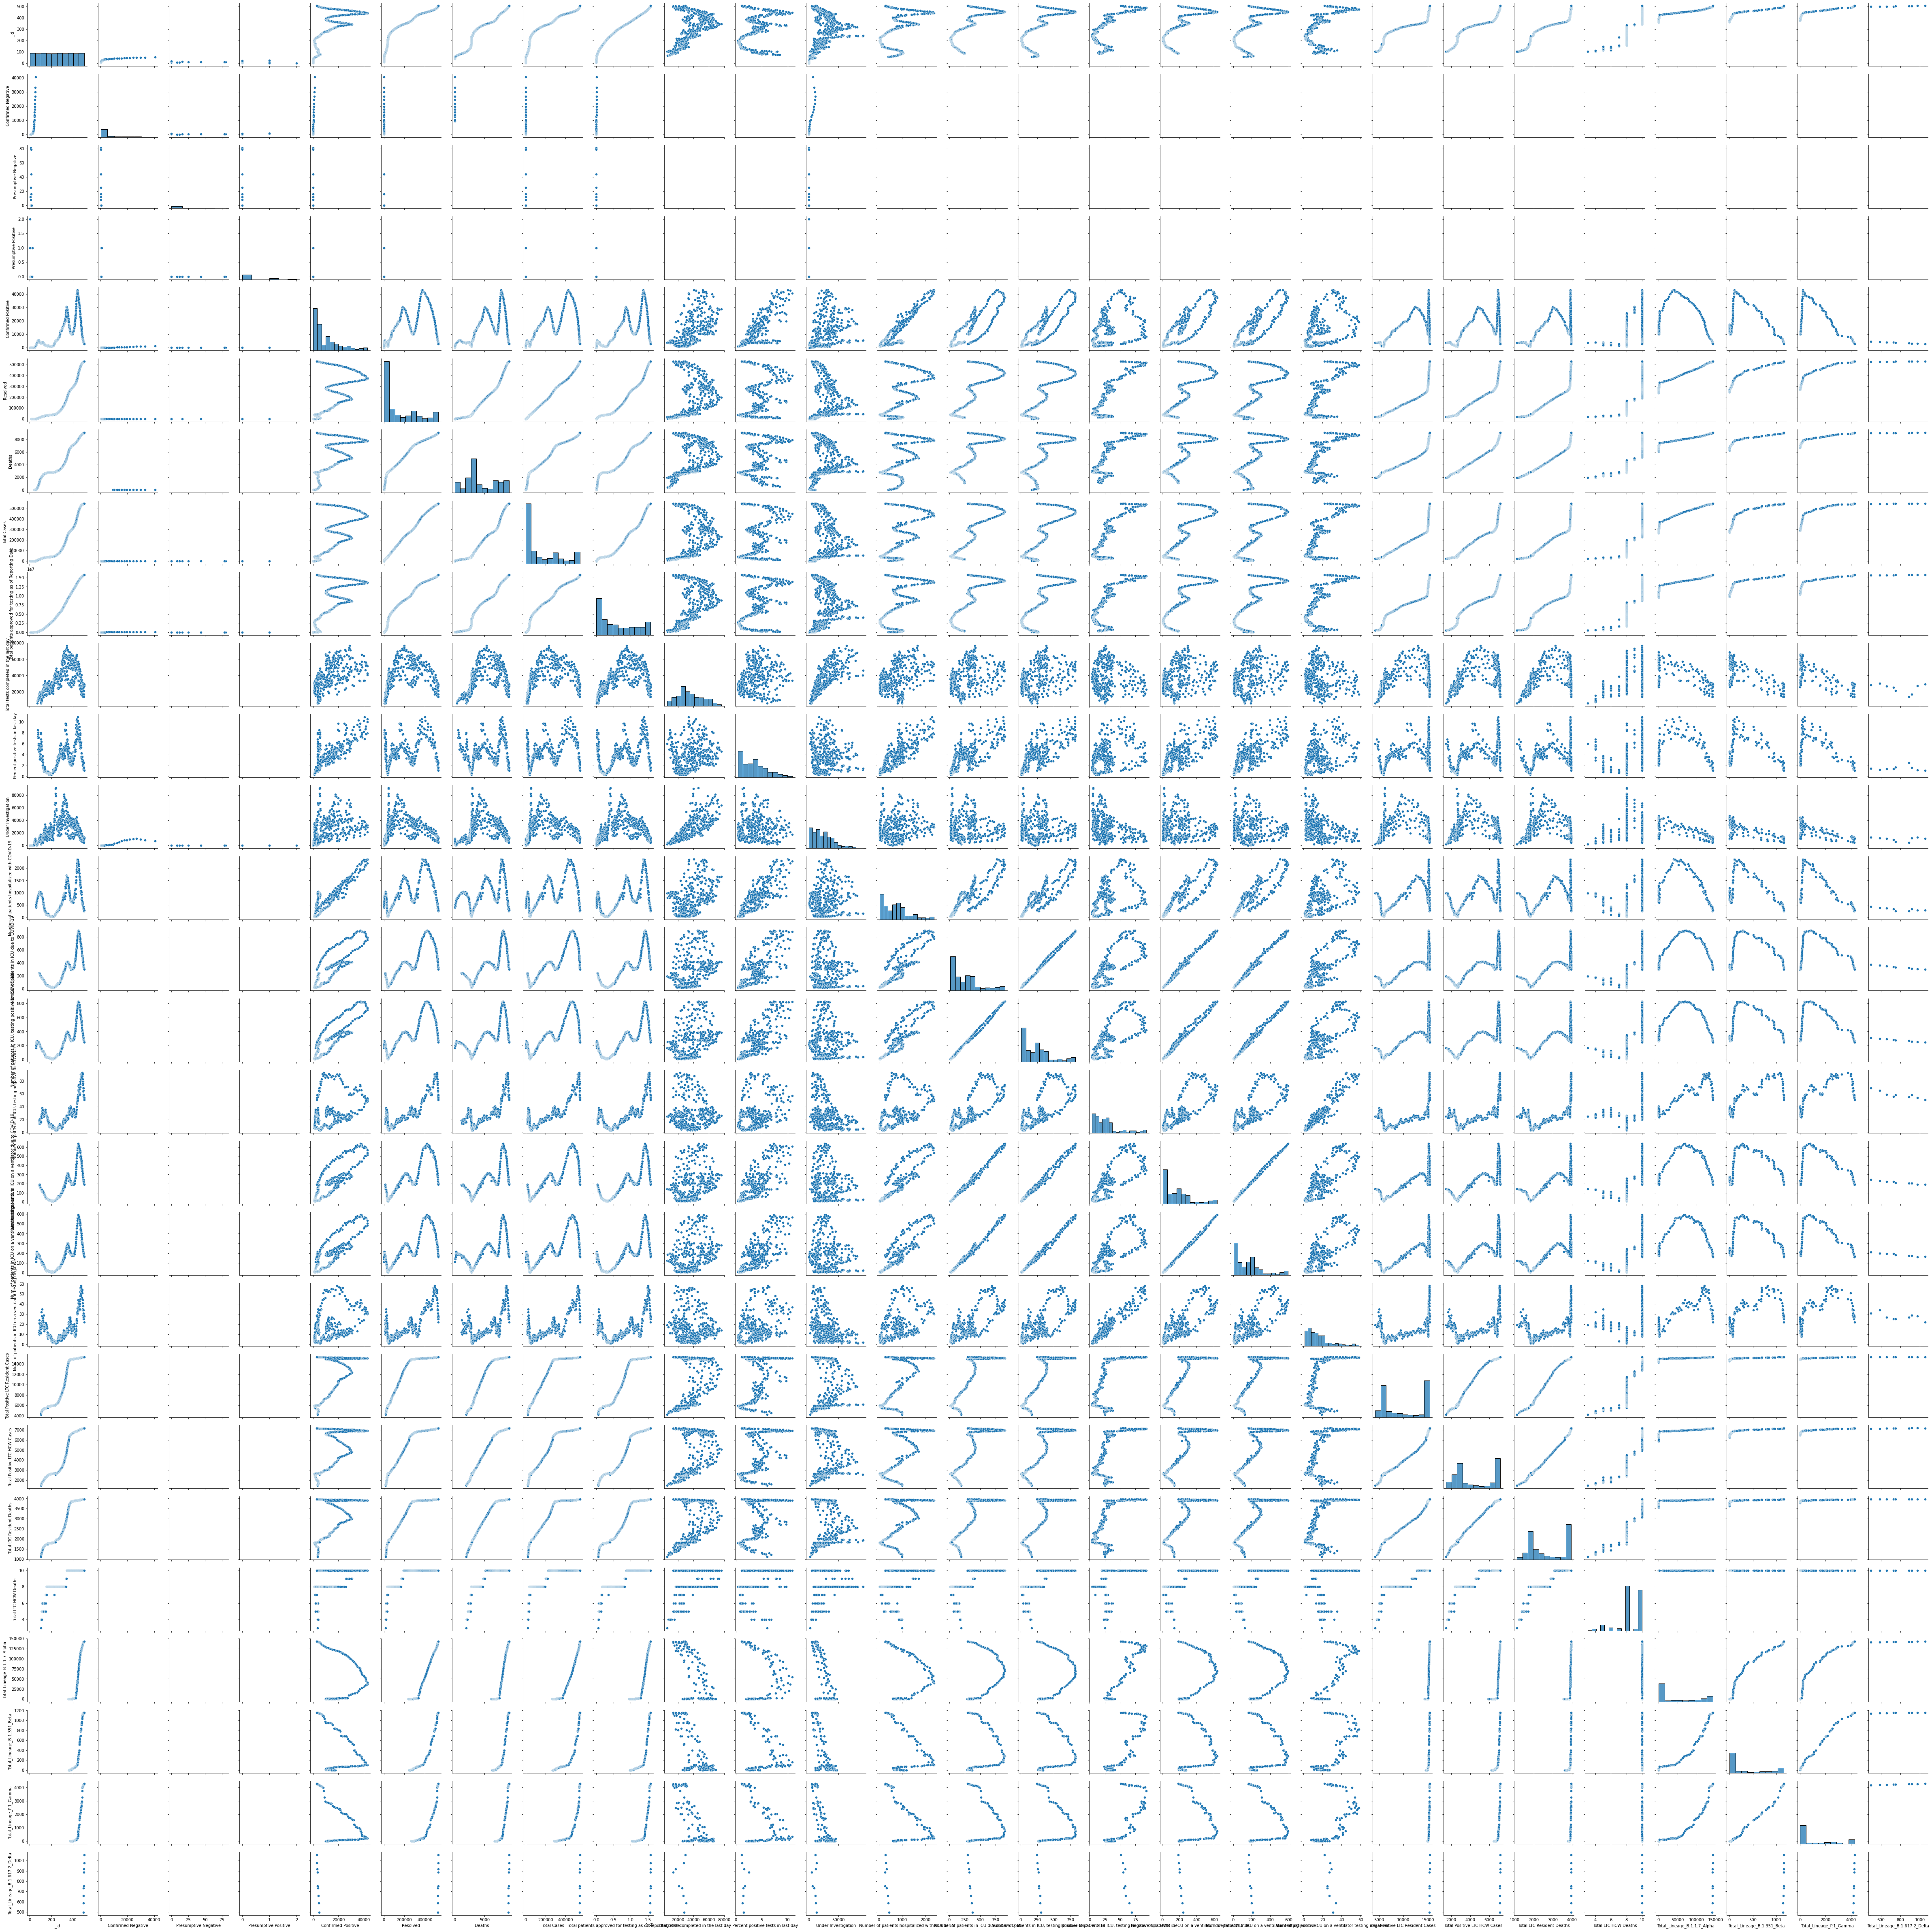

In [16]:
dd.scatter_plots(status_df, plot_mode='matrix')

<AxesSubplot:title={'center':'Correlation Matrix'}>

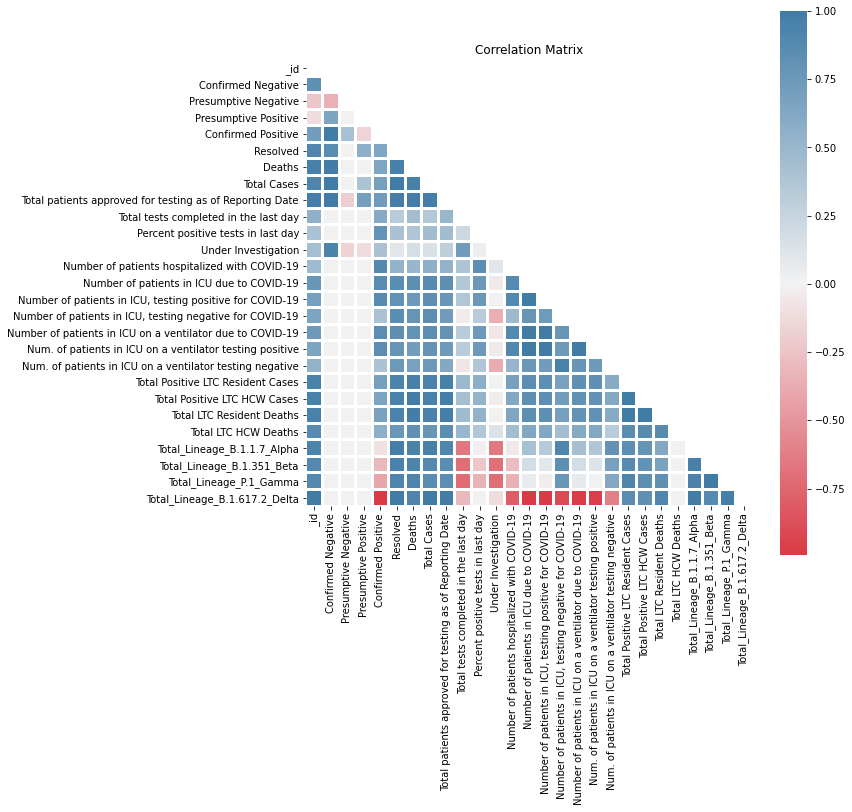

In [17]:
dd.correlation_matrix(status_df)

In [18]:
# sort by date
df = df.sort_values(by=['Accurate_Episode_Date'], ascending=False);
status_df = status_df.sort_values(by=['Reported Date'], ascending=True);

In [19]:
# see how many new cases are reported today in the "confirmed positive" dataset (make sure to change value to today's date)
# keep in mind that the numbers are always missing the most recent day or two
today = df[df['Accurate_Episode_Date'].str.contains("2021-01-10", na=False)]
today.head(10)

_id  Row_ID Accurate_Episode_Date   Case_Reported_Date  \
518764  518725  518725   2021-01-10T00:00:00  2021-01-14T00:00:00   
110960  110943  110943   2021-01-10T00:00:00  2021-01-12T00:00:00   
431870  431843  431843   2021-01-10T00:00:00  2021-01-14T00:00:00   
9241      9214    9214   2021-01-10T00:00:00  2021-01-13T00:00:00   
266370  266362  266362   2021-01-10T00:00:00  2021-01-17T00:00:00   
310474  310469  310469   2021-01-10T00:00:00  2021-01-11T00:00:00   
209676  209670  209670   2021-01-10T00:00:00  2021-01-13T00:00:00   
211650  211645  211645   2021-01-10T00:00:00  2021-01-12T00:00:00   
252748  252741  252741   2021-01-10T00:00:00  2021-01-17T00:00:00   
266267  266257  266257   2021-01-10T00:00:00  2021-01-18T00:00:00   

         Test_Reported_Date        Specimen_Date Age_Group Client_Gender  \
518764  2021-01-14T00:00:00  2020-09-10T00:00:00       40s        FEMALE   
110960  2021-01-12T00:00:00  2021-01-10T00:00:00       90+        FEMALE   
431870  2021-01-14T00:00:00  2021-01-12T00:00:00       <20          MALE   
9241    2021-01-13T00:00:00  2021-01-11T00:00:00       40s        FEMALE   
266370  2021-01-17T00:00:00  2021-01-16T00:00:00       30s          MALE   
310474  2021-01-11T00:00:00  2021-01-10T00:00:00       30s          MALE   
209676  2021-01-13T00:00:00  2021-01-10T00:00:00       <20        FEMALE   
211650  2021-01-12T00:00:00  2021-01-11T00:00:00       <20          MALE   
252748  2021-01-16T00:00:00  2021-01-15T00:00:00       60s        FEMALE   
266267  2021-01-18T00:00:00  2021-01-16T00:00:00       70s        FEMALE   

       Case_AcquisitionInfo  Outcome1 Outbreak_Related  Reporting_PHU_ID  \
518764                   CC  Resolved             None              3895   
110960                   OB  Resolved              Yes              2265   
431870                   CC  Resolved             None              3895   
9241                     CC  Resolved             None              2244   
266370                   OB  Resolved              Yes              2253   
310474  MISSING INFORMATION  Resolved             None              3895   
209676                   CC  Resolved             None              2268   
211650                   CC  Resolved             None              2237   
252748                   CC  Resolved             None              2270   
266267                   CC  Resolved             None              2253   

                             Reporting_PHU           Reporting_PHU_Address  \
518764               Toronto Public Health  277 Victoria Street, 5th Floor   
110960   Region of Waterloo, Public Health          99 Regina Street South   
431870               Toronto Public Health  277 Victoria Street, 5th Floor   
9241          Middlesex-London Health Unit                  50 King Street   
266370                  Peel Public Health          7120 Hurontario Street   
310474               Toronto Public Health  277 Victoria Street, 5th Floor   
209676    Windsor-Essex County Health Unit           1005 Ouellette Avenue   
211650     Hamilton Public Health Services    110 King St. West, 2nd Floor   
252748  York Region Public Health Services              17250 Yonge Street   
266267                  Peel Public Health          7120 Hurontario Street   

       Reporting_PHU_City Reporting_PHU_Postal_Code  \
518764            Toronto                   M5B 1W2   
110960           Waterloo                   N2J 4V3   
431870            Toronto                   M5B 1W2   
9241               London                   N6A 5L7   
266370        Mississauga                   L5W 1N4   
310474            Toronto                   M5B 1W2   
209676            Windsor                   N9A 4J8   
211650           Hamilton                   L8P 4S6   
252748          Newmarket                   L3Y 6Z1   
266267        Mississauga                   L5W 1N4   

                                    Reporting_PHU_Website  \
518764  www.toronto.ca/community-people/health-well

In [20]:
# set the dates to datetime64 for later use
df["Accurate_Episode_Date"] = df["Accurate_Episode_Date"].astype("datetime64")
df["Case_Reported_Date"] = df["Case_Reported_Date"].astype("datetime64")
df["Test_Reported_Date"] = df["Test_Reported_Date"].astype("datetime64")
df["Specimen_Date"] = df["Specimen_Date"].astype("datetime64")

In [21]:
# for accurate daily totals, better to use the "status of covid cases" dataset
# you'll need to create a new column for daily growth in cases
status_df['New Cases'] = status_df['Total Cases'].diff(periods=1).fillna(0)
status_df['New Deaths'] = status_df['Deaths'].diff(periods=1).fillna(0)

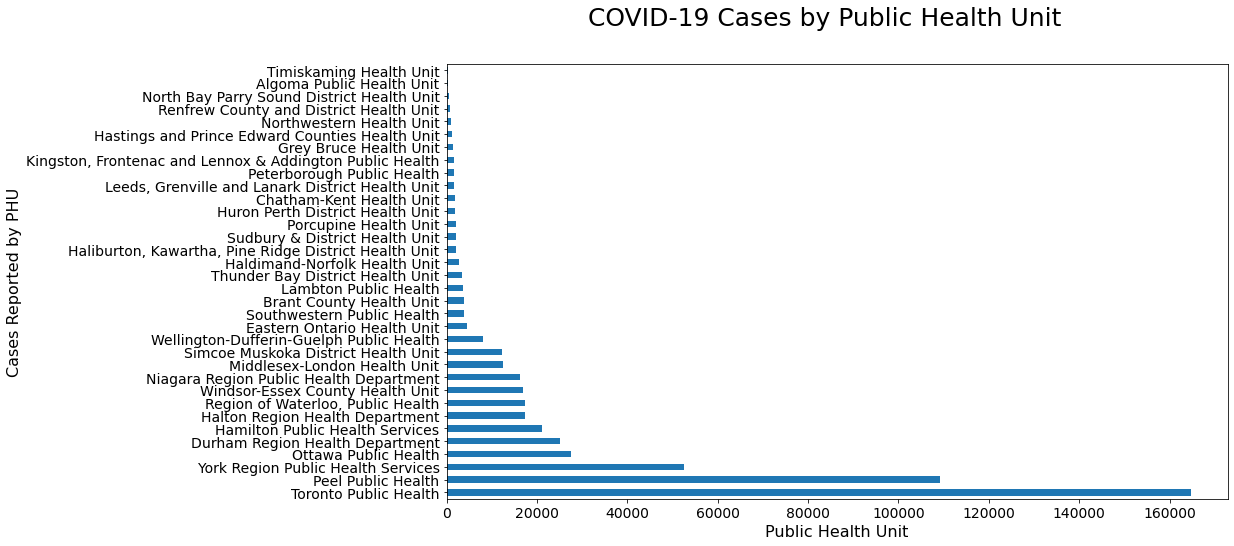

In [22]:
# plot cases by public health unit
fig = plt.figure()
fig.suptitle('COVID-19 Cases by Public Health Unit', fontsize=25) # Add the text/suptitle to figure

ax = df['Reporting_PHU'].value_counts().plot(
    kind='barh', 
    figsize=(14,8)
)
ax.set_xlabel("Public Health Unit", fontsize=16)
ax.set_ylabel("Cases Reported by PHU", fontsize=16)
ax.tick_params(axis='both', labelsize=14)

# if you want to save your graph
# fig.savefig('PHU.jpg')

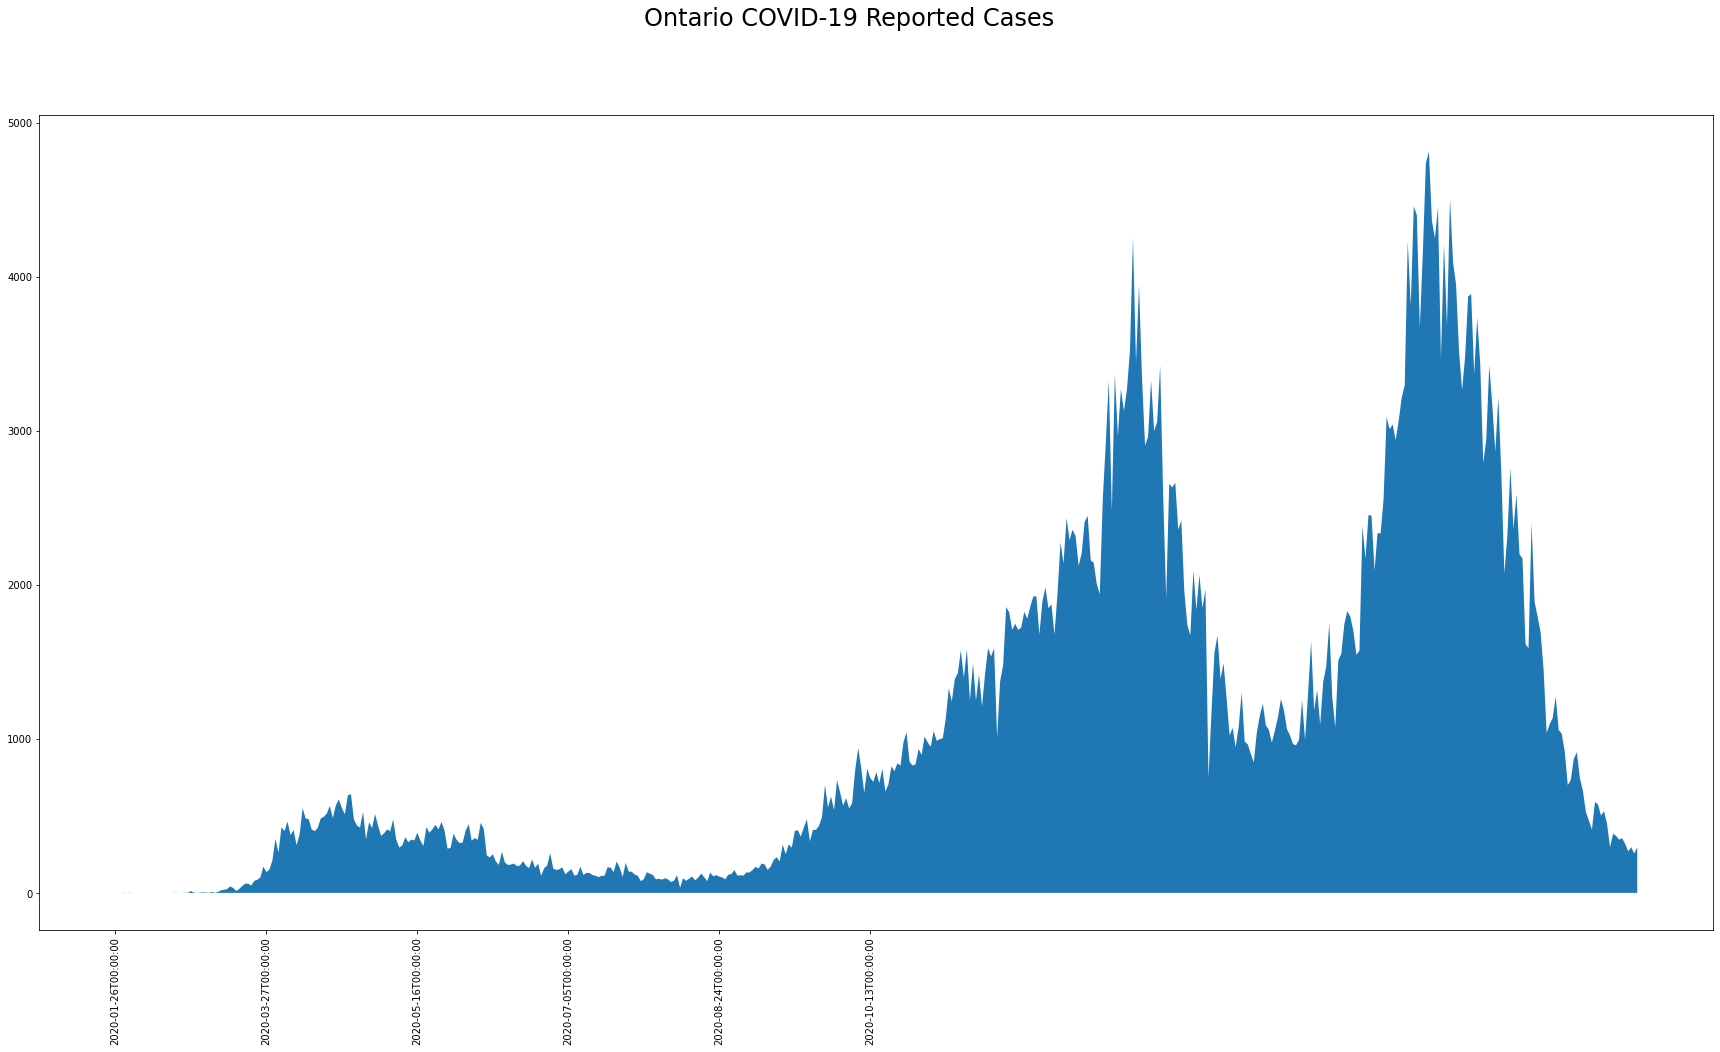

In [23]:
# use vanilla matplotlib to plot new cases based on reported change in the "Status of COVID" dataset
fig = plt.figure()
fig.suptitle('Ontario COVID-19 Reported Cases', fontsize=24) # Add the text/suptitle to figure

y = status_df['New Cases']
x = status_df['Reported Date']
#plt.bar(counts.index,counts)

# plt.plot(x, y) # line plot
plt.fill_between(x, y) # area plot
plt.tick_params(axis ='x', rotation = 90)
plt.xticks(np.arange(0, 300, 50))

plt.show()

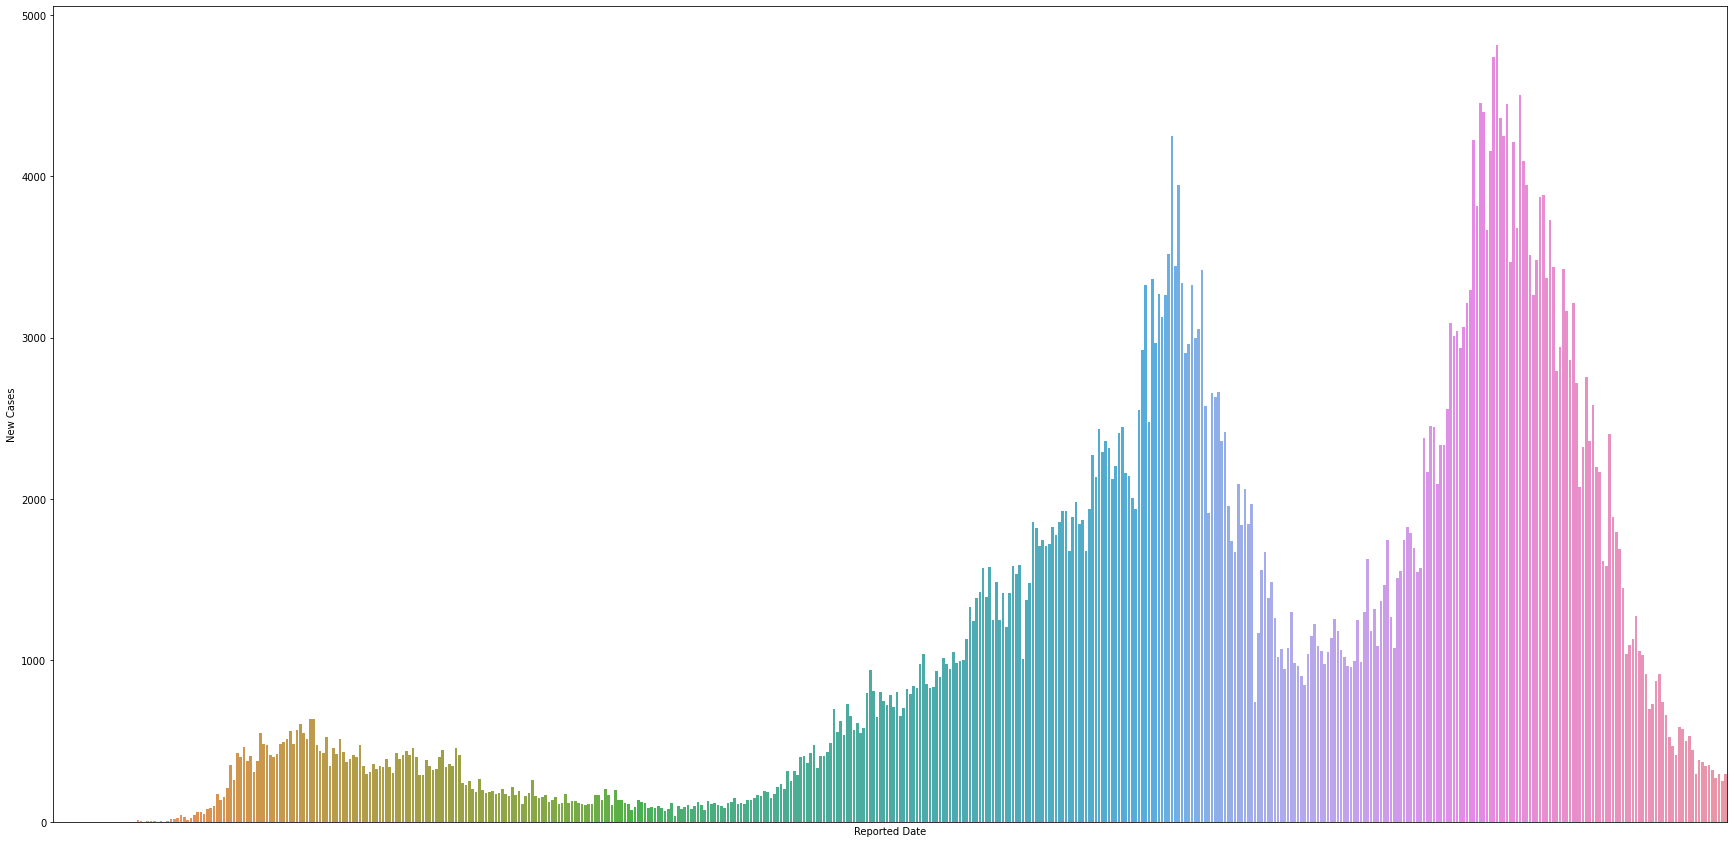

In [24]:
# or using seaborn's barplot
g = sns.barplot(x="Reported Date", y="New Cases",  data=status_df)
g.set(xticks=[]);

# g.fig.set_size_inches(30,15) # and we'll use this to change the figure size

In [25]:
# deaths only
deaths = df[df.Outcome1 == 'Fatal']
deaths.head()

_id  Row_ID Accurate_Episode_Date Case_Reported_Date  \
374474  374452  374452            2021-06-15         2021-06-17   
370328  370320  370320            2021-06-13         2021-06-15   
370299  370292  370292            2021-06-13         2021-06-14   
370406  370398  370398            2021-06-11         2021-06-11   
356852  356844  356844            2021-06-10         2021-06-11   

       Test_Reported_Date Specimen_Date Age_Group Client_Gender  \
374474         2021-06-17    2021-06-16       80s          MALE   
370328         2021-06-15    2021-06-14       90+        FEMALE   
370299         2021-06-14    2021-06-13       80s        FEMALE   
370406         2021-06-11    2021-06-11       50s          MALE   
356852         2021-06-11    2021-06-10       90+          MALE   

       Case_AcquisitionInfo Outcome1 Outbreak_Related  Reporting_PHU_ID  \
374474                   CC    Fatal             None              2246   
370328                   OB    Fatal              Yes              2265   
370299                   OB    Fatal              Yes              2237   
370406                   CC    Fatal             None              2256   
356852                   OB    Fatal              Yes              2246   

                                  Reporting_PHU         Reporting_PHU_Address  \
374474  Niagara Region Public Health Department      1815 Sir Isaac Brock Way   
370328        Region of Waterloo, Public Health        99 Regina Street South   
370299          Hamilton Public Health Services  110 King St. West, 2nd Floor   
370406                    Porcupine Health Unit         169 Pine Street South   
356852  Niagara Region Public Health Department      1815 Sir Isaac Brock Way   

       Reporting_PHU_City Reporting_PHU_Postal_Code  \
374474            Thorold                   L2V 4T7   
370328           Waterloo                   N2J 4V3   
370299           Hamilton                   L8P 4S6   
370406            Timmins                   P4N 8B7   
356852            Thorold                   L2V 4T7   

               Reporting_PHU_Website  Reporting_PHU_Latitude  \
374474   www.niagararegion.ca/health               43.116537   
370328       www.regionofwaterloo.ca               43.462876   
370299  www.hamilton.ca/publichealth               43.257631   
370406         www.porcupinehu.on.ca               48.472510   
356852   www.niagararegion.ca/health               43.116537   

        Reporting_PHU_Longitude  
374474               -79.241220  
370328               -80.520913  
370299               -79.871341  
370406               -81.328750  
356852               -79.241220

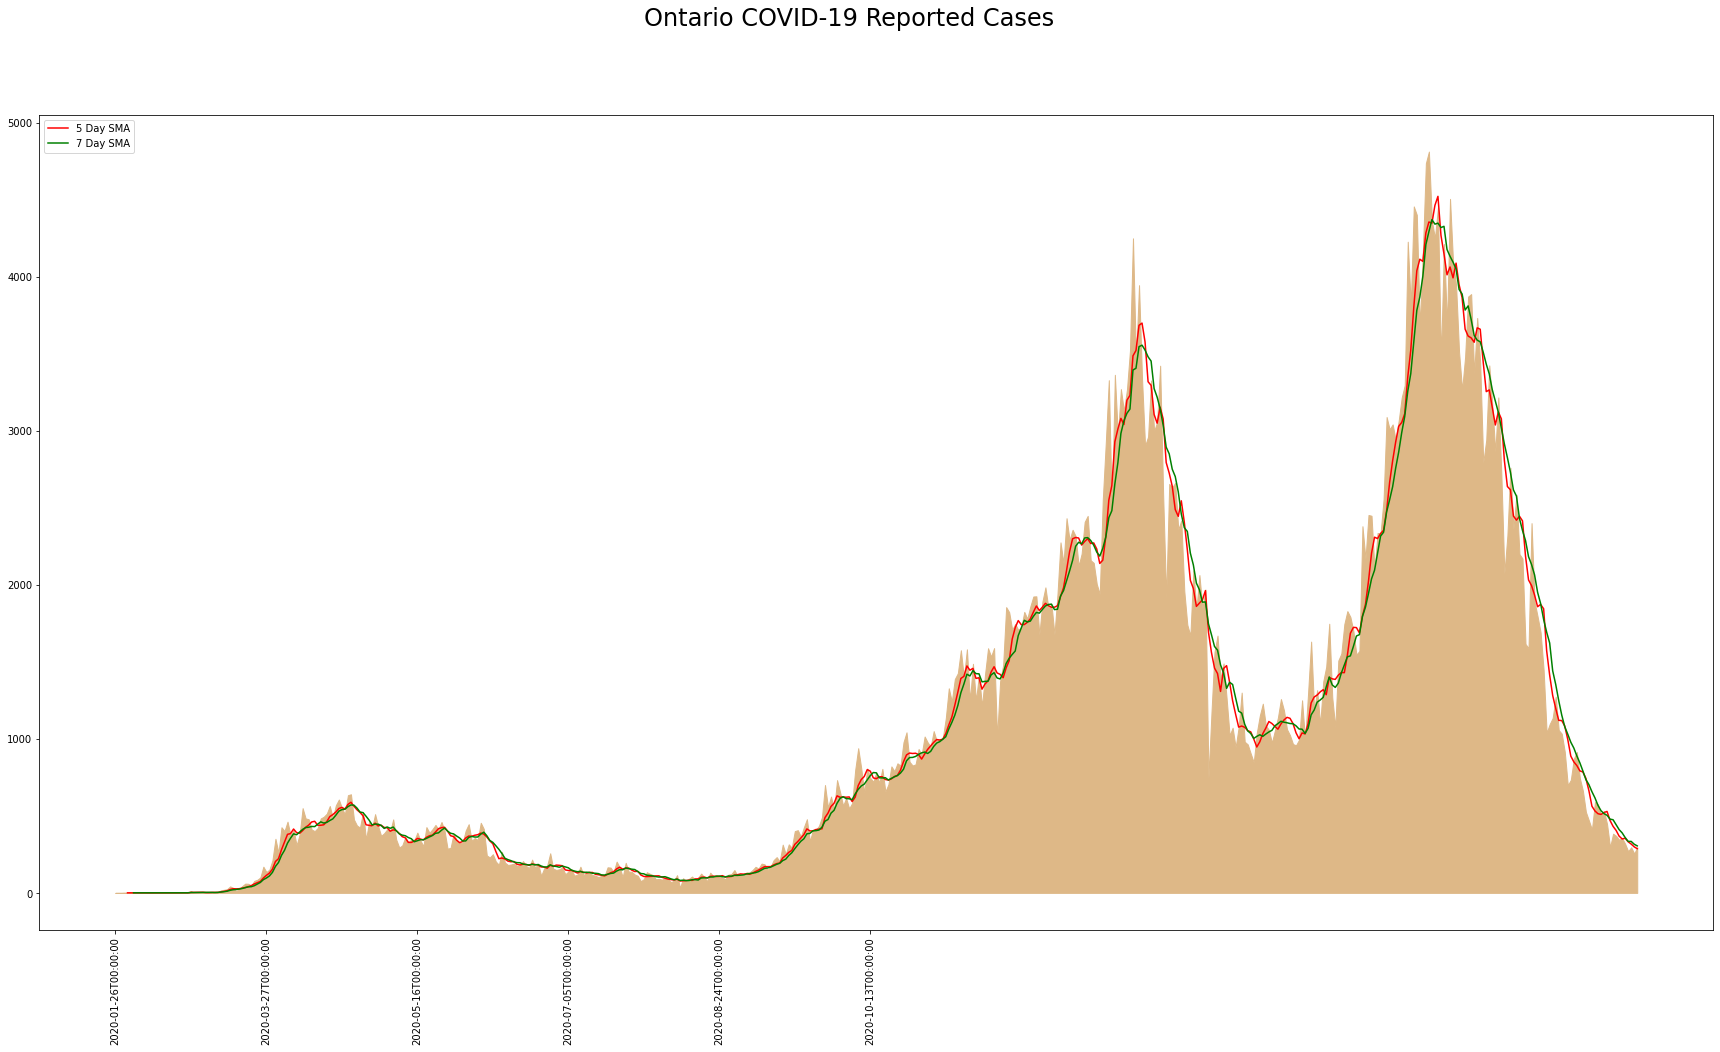

In [26]:
# could use this for covid moving average vaccine['ewm_dose'] = vaccine['new_dosed'].ewm(span = 7).mean() 

# add moving averages
fig = plt.figure()
fig.suptitle('Ontario COVID-19 Reported Cases', fontsize=24) # Add the text/suptitle to figure

# variables for x and y axes
y = status_df['New Cases']
x = status_df['Reported Date']

# create some rolling averages
rolling_mean5 = y.rolling(window=5).mean()
rolling_mean7 = y.rolling(window=7).mean()

#plt.bar(counts.index,counts)
#plt.bar(x, y, color='burlywood')
plt.fill_between(x, y, color='burlywood') # area plot
plt.plot(x, rolling_mean5, label='5 Day SMA', color='red')
plt.plot(x, rolling_mean7, label='7 Day SMA', color='green')
plt.tick_params(axis ='x', rotation = 90)
plt.xticks(np.arange(0, 300, 50))
plt.legend(loc='upper left')
plt.show()

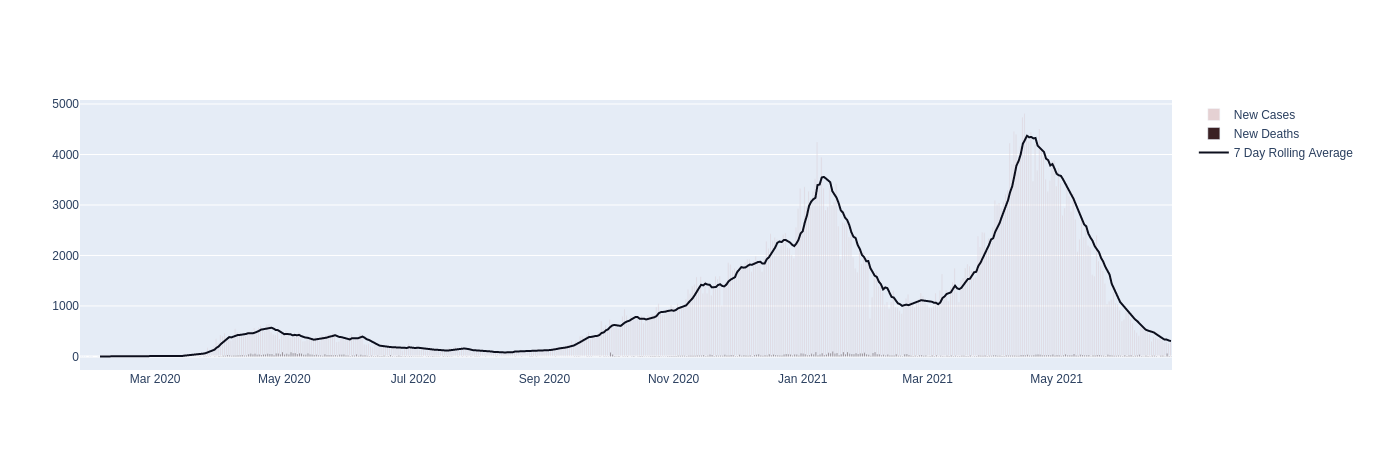

In [27]:
# whole thing in plotly

#fig = make_subplots()
fig = go.Figure()

# This "trace" will display the "other" data
fig.add_trace(go.Bar(
    y = status_df['New Cases'],
    x = status_df['Reported Date'],
    name = 'New Cases',
    marker_color='rgb(204,164,168)',
    # marker_line_color="black",
    hoverinfo = ['all'],
    opacity=0.5
))

fig.add_trace(go.Bar(
    y = status_df['New Deaths'],
    x = status_df['Reported Date'],
    name = 'New Deaths',
    marker_color='rgb(59,33,36)',
    # marker_line_color="black",
    hoverinfo = ['all']
))

fig.add_trace(go.Scatter(
    y = rolling_mean7,
    x = status_df['Reported Date'],
    mode='lines',
    name = '7 Day Rolling Average',
    line_color='rgb(12,15,29)',
    hoverinfo = ['all']
))

#fig.add_annotation(
#    x = status_df.at['Reported Date'] == '2020-10-02T00:00:00',
    # 2020-10-02T00:00:00     
    #y = status_df['New Deaths'],
#    text="Province dumped a whole bunch of new deaths",
#    showarrow=True,
#    arrowhead=1
#)

#fig.update_layout(
#    autosize=False,
#    width=1800,
#    height=900
#)

#plotly.offline.plot(fig, filename='ontario_covid.html')
fig.show()

In [28]:
# use matplotlib to plot reported cases from the "conpos" dataset
#fig = plt.figure()
#fig.suptitle('Ontario COVID-19 Reported Cases', fontsize=24) # Add the text/suptitle to figure

#counts = df['Case_Reported_Date'].value_counts()
#plt.bar(counts.index,counts)

# extra options
# ax.set_xlabel("Public Health Unit", fontsize=16)
# ax.set_ylabel("Cases Reported by PHU", fontsize=16)
# ax.tick_params(axis='both', labelsize=14)
# plt.show()

In [29]:
# same thing, but using seaborn lets us plot a kernel density estimate (which can visually stand in for a running average)
# gotta watch out for that drop-off, though
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html

#sns.set()
#ax = sns.histplot(df['Case_Reported_Date'], kde=True, bins=300)

In [30]:
# comparisons based on gender
#g = sns.displot(df, x="Accurate_Episode_Date", hue="Client_Gender", bins=300)
#g.set_xticklabels(rotation=90)
#g.fig.set_size_inches(30,5)

In [31]:
# side-by-side comparison based on age group for a recent day
#g = sns.displot(today, x="Outcome1", hue="Outcome1", col="Age_Group")
#g.set_xticklabels(rotation=90)
#sns.set(font_scale=1.3) # seaborn's method for setting fontsize is pretty dumb
#g.fig.set_size_inches(20,10)

In [32]:
# see how many new cases are reported today in the "confirmed positive" dataset (make sure to change value to today's date)
# keep in mind that the numbers are always missing the most recent day or two
# five_days = df[df['Accurate_Episode_Date'].str.contains("2020-10-23", na=False)]
# today.head()

In [33]:
# or how about age group x outcome
#deaths = deaths.replace(['<20'],'10s') # either re-set the order, or re-name <20 to something like 10s
#deaths = deaths.sort_values('Age_Group', ascending=True) 

# deaths only
#deaths = df[df.Outcome1 == 'Fatal']
#deaths.head()
#g = sns.displot(deaths, x="Age_Group", multiple="dodge")
#sns.color_palette("tab10")
#g.set_xticklabels(rotation=90)
#g.fig.set_size_inches(20,10)

# side-by-side comparison
g = sns.displot(deaths, x="Age_Group", hue="Client_Gender", multiple="dodge", col="Client_Gender")
g.set_xticklabels(rotation=90)
sns.set(font_scale=1.3) # seaborn's method for setting fontsize is pretty dumb
g.fig.set_size_inches(20,10)
# Some things to fix: 

* Re-order x axis (seaborn won't order age groups by default)
* Increase fonts (or change default matplotlib/seaborn options at the top of my notebook)
* Change colour palettes
* Make sure my H x W ratios are appropriate (see here: https://stats.stackexchange.com/questions/185346/what-is-the-best-ratio-between-width-and-height-in-a-bar-chart)
* Get rid of the NaNs in the dataset
* Make some more space between the age categories

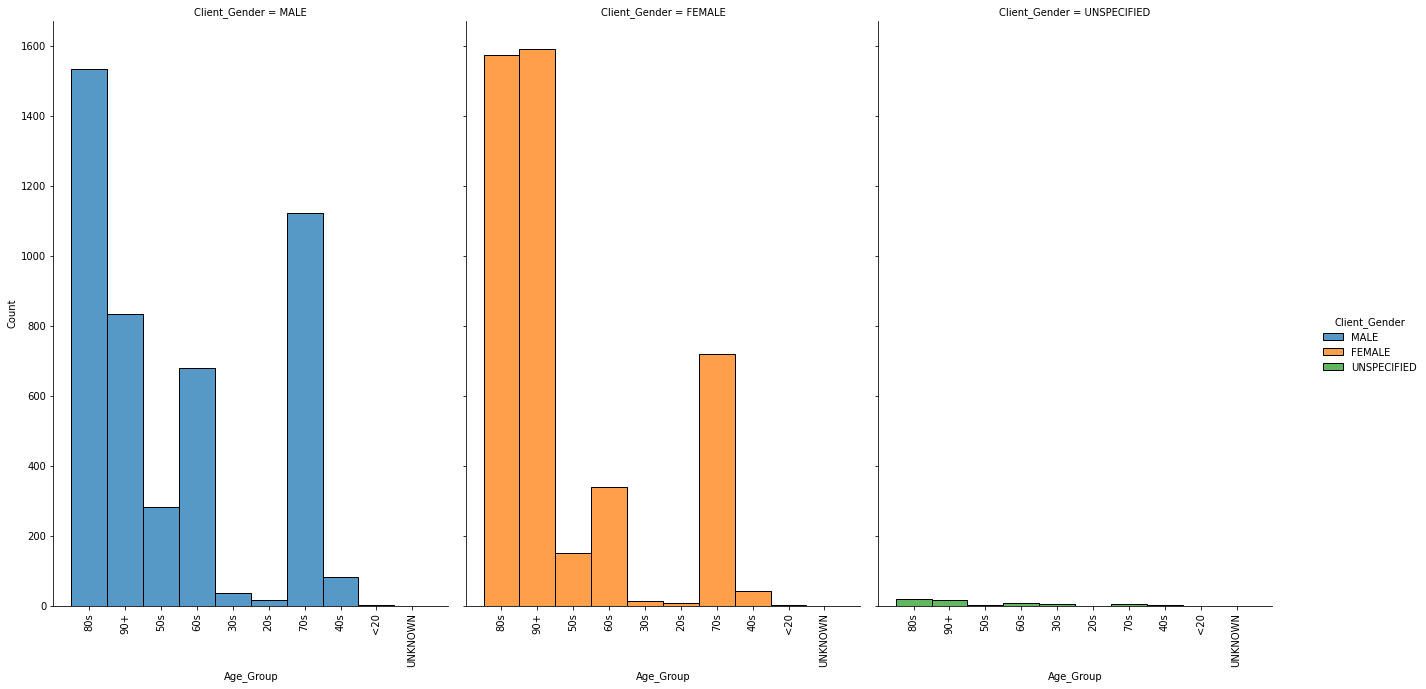

In [34]:
# side-by-side comparison
g = sns.displot(deaths, x="Age_Group", hue="Client_Gender", multiple="dodge", col="Client_Gender")
g.set_xticklabels(rotation=90)
sns.set(font_scale=1.3) # seaborn's method for setting fontsize is pretty dumb
g.fig.set_size_inches(20,10)

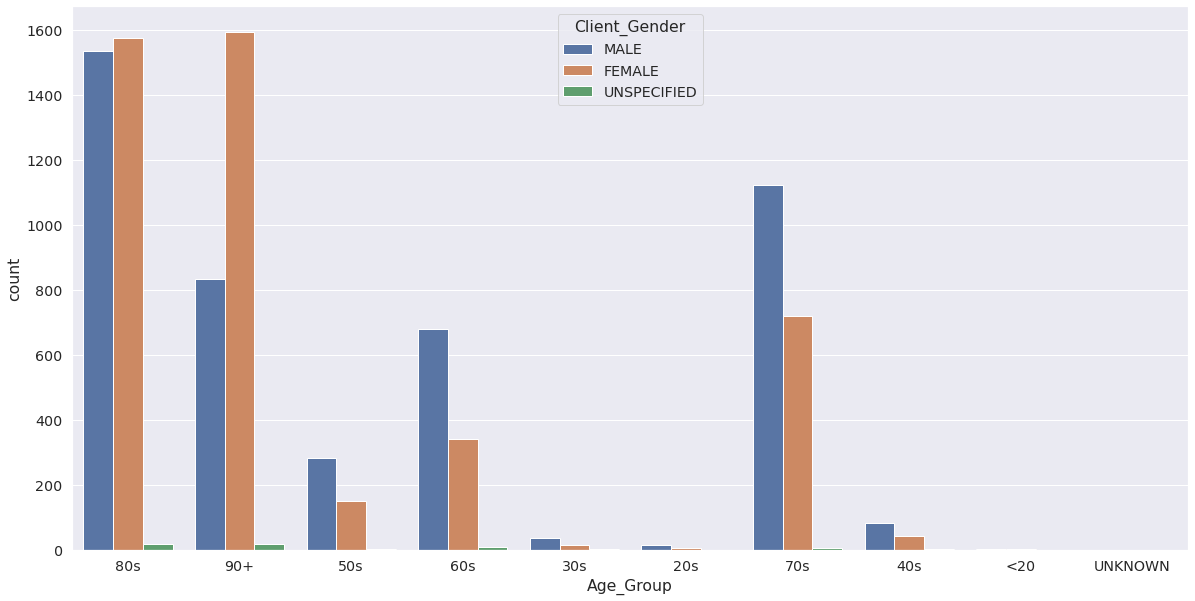

In [35]:
plt.figure(figsize=(20,10))
age = ["19 and younger", "20 to 29 Years", "30 to 39 Years", "40 to 49 Years", "50 to 59 Years", "60 to 69 Years", "70 to 79 Years", "80 to 89 Years", "90 and older"]
g = sns.countplot(data=deaths, x="Age_Group", hue="Client_Gender")
sns.set(font_scale=1.3) # seaborn's method for setting fontsize is pretty dumb

In [36]:
# mar
mar_start = pd.to_datetime('2021-03-01')
mar_end = pd.to_datetime('2021-03-31')
mar_2021 = deaths.loc[(deaths['Accurate_Episode_Date'] > mar_start) & (deaths['Accurate_Episode_Date'] < mar_end)]

# apr
apr_start = pd.to_datetime('2021-04-01')
apr_end = pd.to_datetime('2021-04-30')
apr_2021 = deaths.loc[(deaths['Accurate_Episode_Date'] > apr_start) & (deaths['Accurate_Episode_Date'] < apr_end)]

# may
may_start = pd.to_datetime('2021-05-01')
may_end = pd.to_datetime('2021-05-31')
may_2021 = deaths.loc[(deaths['Accurate_Episode_Date'] > may_start) & (deaths['Accurate_Episode_Date'] < may_end)]

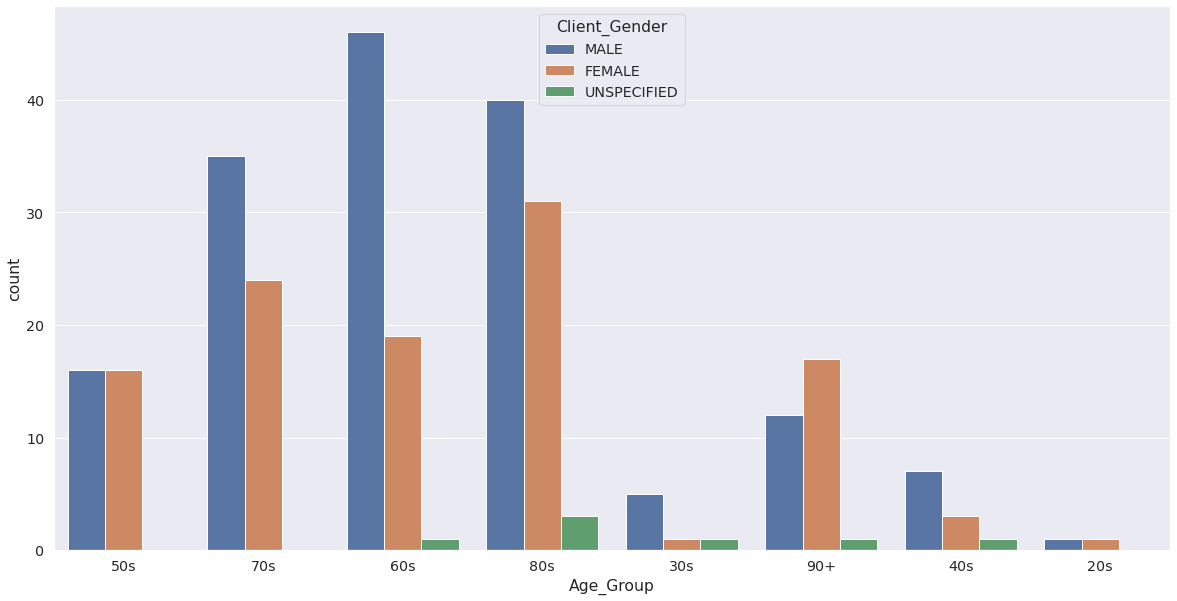

In [37]:
plt.figure(figsize=(20,10))
g = sns.countplot(data=may_2021, x="Age_Group", hue="Client_Gender")
sns.set(font_scale=1.3)

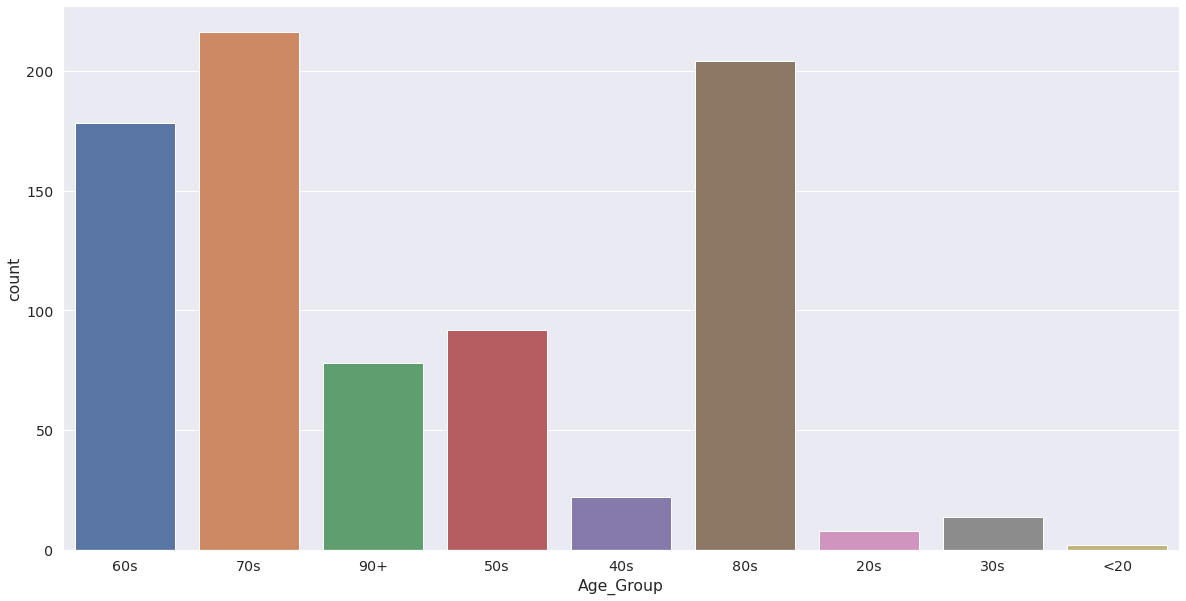

In [38]:
plt.figure(figsize=(20,10))
g = sns.countplot(data=apr_2021, x="Age_Group")
sns.set(font_scale=1.3)

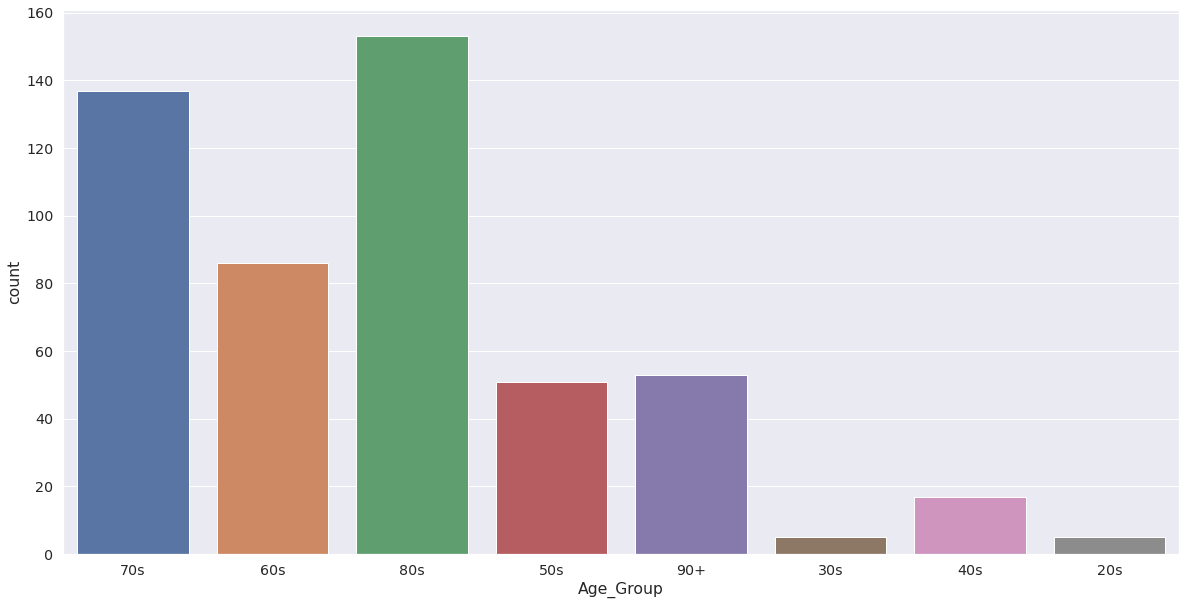

In [39]:
plt.figure(figsize=(20,10))
g = sns.countplot(data=mar_2021, x="Age_Group")
sns.set(font_scale=1.3)

# do small multiples with plotly and bar race in mpl
https://plotly.com/python/subplots/

https://pratapvardhan.com/blog/bar-chart-race-python-matplotlib/